## Syngonium Podophyllum Leaf Curvature
___

#### Prerequisite Papers:

[1] Bernd Schmidt, Plate theory for stressed heterogenous multilayers of finite bending energy, 2007, Journal de Mathématiques Pures et Appliquées, vol. 88, no. 1, pages 107-122, doi. https://doi.org/10.1016/j.matpur.2007.04.011


#### 1. Define Goal:
__ 19.10.2024 __
1. Calculate the (symmmetric) layer mismatch for the curvature measurements of Sygonium Podophyllum.
2. Derive a formula for the (symmetric) layer mismatch given measured radii.

__ 28.11.2024 __

3. Input the measured data concerning the number of cells in the lower and upper layers at different time stages
4. Calculate the Layer Mismatches from them
5. Calculate the predicted radius and compare to the measured radius.

# __19.10.2024__
#### 2. Define Constants to use for the following measurements

In [293]:
YOUNGS_MODULUS = 5.963
POISSON_RATIO = 0.3

#### 3. Reading in the Data

In [294]:
import pandas as pd
import numpy as np

df = pd.read_excel("pilea data 2.0/Spod_leaf-curvature_final-measurements.xlsx", sheet_name="Data", skiprows=1)
df

,leaf stage,sample,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm
0,J0,C01,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.524540,0.165667,60.448,0.002741
1,J0,C02,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.948,3.553,2.138532,0.467611,0.060667,0.143433,0.422961,0.204100,73.546,0.002775
2,J0,C03,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,0.896,2.754,1.506108,0.663963,0.051367,0.171333,0.299805,0.222700,41.638,0.005348
3,J0,C04,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,1.387,4.405,2.442241,0.409460,0.050667,0.131333,0.385787,0.182000,46.339,0.003928
4,J0,C06,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.204,3.987,2.252350,0.443981,0.061000,0.144667,0.421659,0.205667,62.311,0.003301
5,J1,A01,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.070333,0.106000,0.663522,0.176333,60.348,0.002922
6,J1,C02,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.514107,0.161000,53.834,0.002991
7,J1,C03,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.443925,0.206000,43.277,0.004760
8,J1,C04,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.361607,0.203333,64.786,0.003139
9,J1,C05,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.050333,0.136333,0.369193,0.186667,81.568,0.002288


#### 4. Translating the middle surface

The middle surface $\tau$ in the table above is the ratio between the *thickness_upper* and *thickness_lower*. We want to translate it to a number $\tilde{\tau}$ such that $[-1/2, \tilde{\tau}]$ and $[\tilde{\tau}, 1/2]$ are the rescaled top and bottom layer respectively (i.e their ratio is identical). We therefore have to following connection
$$\frac{1/2 - \tilde{\tau}}{\tilde{\tau} + 1/2} = \tau \quad \Leftrightarrow \quad \frac{1}{2} \cdot \frac{1-\tau}{\tau + 1} = \tilde{\tau}$$
We will replace $\tau$ with $\tilde{\tau}$ and just call the updated values $\tau$ again.

In [295]:
df["middle surface τ"] = 0.5 * (1 - df["middle surface τ"]) / (df["middle surface τ"] + 1)
df

,leaf stage,sample,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm
0,J0,C01,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741
1,J0,C02,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.948,3.553,2.138532,0.467611,0.060667,0.143433,0.202760,0.204100,73.546,0.002775
2,J0,C03,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,0.896,2.754,1.506108,0.663963,0.051367,0.171333,0.269346,0.222700,41.638,0.005348
3,J0,C04,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,1.387,4.405,2.442241,0.409460,0.050667,0.131333,0.221612,0.182000,46.339,0.003928
4,J0,C06,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.204,3.987,2.252350,0.443981,0.061000,0.144667,0.203404,0.205667,62.311,0.003301
5,J1,A01,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.070333,0.106000,0.101134,0.176333,60.348,0.002922
6,J1,C02,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991
7,J1,C03,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760
8,J1,C04,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139
9,J1,C05,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.050333,0.136333,0.230357,0.186667,81.568,0.002288


#### 5. Some Theory & A Simple Scheme to determine the mismatch

The calculation below is based on the imported script *tubes.py* which takes in the layer mismatch among other variables and calculates an expected radius (under the assumption that the theory applies here) i.e $F(b_{\text{top}}, b_{\text{bot}}, \ldots) = r_{\text{calculated}}$. In our case we have $r_{\text{calculated}}$ available and want to determine a pair of $b_{\text{top}}, b_{\text{bot}}$. Due to the nature of this problem, we will have one degree of freedom. Let's therefore first regard symmetric layer mismatches where $b_{\text{top}} = - b_{\text{bot}}$.

Looking at the equations, it is not hard to see that $\kappa$ depends only on $b_{\text{top}}$ and $b_{\text{bot}}$ through $f_0$ and this depenence is linear! Indeed, we have
$$\kappa = \frac{ e_1^\top \mathcal{M}_0 f_0}{ e_1^\top \mathcal{M}_0 e_1}$$
which is linear in $f_0$. Next we have
$$f_0 = \mathcal{M}_0^{-1} (\mathcal{M}_2 \mathcal{M}_1^{-1} b_1 - b_2)$$
By reference [1], we may w.l.o.g choose $b_1 = 0$, therefore $f_0$ is linear in $b_2$. Finally we have
$$b_2 = \left(\frac{1}{2} \tau^2 - \frac{1}{8}\right) \mathcal{M}_{\text{bot}} b_{\text{bot}} - \left( \frac{1}{8} - \frac{1}{2}\tau^2 \right) \mathcal{M}_{\text{top}} b_{\text{top}}$$
By the assumption of symmetric layer mismatch, we have $b_{\text{top}} = -b_{\text{bot}}$. Therefore, using this property above immediately shows the linearity of $\kappa$ in $b$, i.e.
$$\nabla_b \kappa = \begin{pmatrix}\frac{\partial \kappa}{\partial b_{\text{top}}} & \frac{\partial \kappa}{\partial b_{\text{top}}} \end{pmatrix}^\top \equiv \text{const.}$$ 
Also it is clear that increasing the layer mismatch will decrease the output radius of $F$.
Therefore we can implement a very rudimentary scheme that succesively tries layer mismatches and adjusts by a factor in the correct direction, if the resulting output radius $r_{\text{calculated}}$ is too far away from the measurement.

Using this calculated layer mismatch we also add the relative deviation to the DataFrame:

In [296]:
#import code
from tubes import optimal_radius

def _apply_find_layer_mismatch(df_row):
    b_current = 1
    while True:
        current = optimal_radius(tau=df_row["middle surface τ"],
                                 h=df_row["plate thickness h_mm"],
                                 total_thickness=df_row["total thickness_mm"],
                                 btop=b_current,
                                 bbot=-b_current,
                                 youngs_modulus=YOUNGS_MODULUS,
                                 poisson_ratio=POISSON_RATIO,
                                 measured_radius=df_row["r_mm"])
        difference = current["calculated_radius"] - df_row["r_mm"]
        if abs(difference) < 0.001:
            break
        elif difference > 0:
            b_current *= 1.1
        elif difference < 0:
            b_current *= 0.9

    return pd.Series([b_current, current["relative_deviation"]])

df_mismatch_from_radius = df.copy()
df_mismatch_from_radius[["sym_layer_mismatch", "radius: relative_deviation"]] = df_mismatch_from_radius.apply(_apply_find_layer_mismatch, axis=1)
df_mismatch_from_radius["sym_layer_mismatch (rescaled)"] = df_mismatch_from_radius["plate thickness h_mm"] * df_mismatch_from_radius["sym_layer_mismatch"]
df_mismatch_from_radius


,leaf stage,sample,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm,sym_layer_mismatch,radius: relative_deviation,sym_layer_mismatch (rescaled)
0,J0,C01,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741,9.088789,0.000197,0.024909
1,J0,C02,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.948,3.553,2.138532,0.467611,0.060667,0.143433,0.202760,0.204100,73.546,0.002775,10.556994,-0.000313,0.029297
2,J0,C03,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,0.896,2.754,1.506108,0.663963,0.051367,0.171333,0.269346,0.222700,41.638,0.005348,9.990951,-0.000415,0.053436
3,J0,C04,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,1.387,4.405,2.442241,0.409460,0.050667,0.131333,0.221612,0.182000,46.339,0.003928,6.054750,-0.000039,0.023780
4,J0,C06,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.204,3.987,2.252350,0.443981,0.061000,0.144667,0.203404,0.205667,62.311,0.003301,8.504015,-0.000438,0.028069
5,J1,A01,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.070333,0.106000,0.101134,0.176333,60.348,0.002922,8.643347,-0.000349,0.025255
6,J1,C02,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991,10.200661,-0.000452,0.030507
7,J1,C03,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760,5.287426,0.000183,0.025168
8,J1,C04,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139,10.250327,-0.000062,0.032171
9,J1,C05,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.050333,0.136333,0.230357,0.186667,81.568,0.002288,9.149798,-0.000240,0.020939


#### 6. Explanation of the Layer Mismatch

The symmetric layer mismatch determines the expansion/shrinkage of the top/bottom layer. In our case, if we have a **rescaled** symmetric layer mismatch of $b \in \mathbb{R}$, then this means that the top layer and bottom layer want to shrink and expand by a factor of
$$\frac{1}{1+b},\qquad \text{and} \qquad \frac{1}{1-b}$$
respectively, which induces the curvature.

#### 7. Obtaining a Formula for the Layer Mismatch

The simple scheme is a good starting point to get the right order of magnitude. However we are interested in an exact formula for the layer mismatch given a measured radius:

\begin{align*}
    \Leftrightarrow \qquad & r_{\text{calculated}} \overset{!}{=} r_{\text{measured}} \\
    \Leftrightarrow \qquad & \frac{d}{\kappa h} = r_{\text{measured}} \\
    \Leftrightarrow \qquad & \kappa = \frac{d}{h}\frac{1}{r_{\text{measured}}} \\
    \Leftrightarrow \qquad & \frac{\beta}{\alpha} = \frac{d}{h}\frac{1}{r_{\text{measured}}} \\
    \Leftrightarrow \qquad & \beta = \frac{d}{h}\frac{\alpha}{r_{\text{measured}}} \\
    \Leftrightarrow \qquad & e_1^\top \mathcal{M}_0 f_0 = \frac{d}{h}\frac{e_1^\top \mathcal{M}_0 e_1}{r_{\text{measured}}} \\
\end{align*}



here $d$ denotes the total plate/leaf thickess. By [1], we may w.l.o.g assume $b_1 = 0$, such that

\begin{align*}
    \Leftrightarrow \qquad & e_1^\top \mathcal{M}_0 (-\mathcal{M}_0^{-1}b_2) = \frac{d}{h}\frac{e_1^\top \mathcal{M}_0 e_1}{r_{\text{measured}}} \\
    \Leftrightarrow \qquad & -e_1^\top b_2 = \frac{d}{h}\frac{e_1^\top \mathcal{M}_0 e_1}{r_{\text{measured}}} \\
    \Leftrightarrow \qquad & -e_1^\top \left( \left(\frac{1}{2} \tau^2 - \frac{1}{8}\right) M_{\text{bot}} \begin{pmatrix} -b_{\text{sym}} \\ -b_{\text{sym}} \\ 0 \end{pmatrix} + \left(\frac{1}{8} - \frac{1}{2} \tau^2\right) M_{\text{top}} \begin{pmatrix} b_{\text{sym}} \\ b_{\text{sym}} \\ 0 \end{pmatrix} \right) = \frac{d}{h}\frac{e_1^\top \mathcal{M}_0 e_1}{r_{\text{measured}}} \\
\end{align*}

In order to simplify the formula, we will assume that both layers are isotropic with the same isotropy constants i.e. we have $M_{\text{bot}} = M_{\text{top}} =: M_{\text{iso}}$ such that

\begin{align*}
    \Leftrightarrow \qquad & -e_1^\top \left( \left(\frac{1}{2} \tau^2 - \frac{1}{8}\right) M_{\text{bot}} \begin{pmatrix} -b_{\text{sym}} \\ -b_{\text{sym}} \\ 0 \end{pmatrix} + \left(\frac{1}{8} - \frac{1}{2} \tau^2\right) M_{\text{top}} \begin{pmatrix} b_{\text{sym}} \\ b_{\text{sym}} \\ 0 \end{pmatrix} \right) = \frac{d}{h}\frac{e_1^\top \mathcal{M}_0 e_1}{r_{\text{measured}}} \\
    \Leftrightarrow \qquad & \left( \tau^2 - \frac{1}{4} \right) e_1^\top M_{\text{iso}} \begin{pmatrix} b_{\text{sym}} \\ b_{\text{sym}} \\ 0 \end{pmatrix} = \frac{d}{h}\frac{e_1^\top \mathcal{M}_0 e_1}{r_{\text{measured}}} \\
    \Leftrightarrow \qquad & b_{\text{sym}}\left( \tau^2 - \frac{1}{4} \right) e_1^\top M_{\text{iso}} (e_1 + e_2) = \frac{d}{h}\frac{e_1^\top \mathcal{M}_0 e_1}{r_{\text{measured}}} \\
    \Leftrightarrow \qquad & b_{\text{sym}} = \frac{d}{h} \frac{e_1^\top \mathcal{M}_0 e_1}{e_1^\top M_{\text{iso}} (e_1 + e_2)} \frac{1}{\tau^2 - \frac{1}{4}} \frac{1}{r_{\text{measured}}}
\end{align*}

Finally due to symmetry and with abuse of notation, we may flip the sign of the righthand-side to arrive at
\begin{equation} b_{\text{sym}} = \frac{d}{h} \frac{e_1^\top \mathcal{M}_0 e_1}{e_1^\top M_{\text{iso}} (e_1 + e_2)} \frac{1}{\frac{1}{4} - \tau^2}\frac{1}{r_{\text{measured}}}, \qquad \tau \in \left(-\frac{1}{2}, \frac{1}{2} \right), \qquad \mathcal{M}_0 = \mathcal{M}_0(M_{\text{iso}}, \tau) \in \mathbb{R}^{3 \times 3}, \qquad M_{\text{iso}} = M_{\text{iso}}(E, \nu) \in \mathbb{R}^{3 \times 3} \end{equation}
here $E$ denotes Young's Modulus and $\nu$ denotes Poisson's Ratio. Notice  $b_{\text{sym}}$ refers to the lower layer mismatch after the sign change.

Furthermore the matrix $\mathcal{M}_0$ is given by
$$\mathcal{M}_0 = \mathcal{M}_3 - \mathcal{M}_2 \mathcal{M}_1^{-1} \mathcal{M}_2$$
If we assume both the top and bottom layer having the same isotropy constants, these matricies in turn are given by
$$\mathcal{M}_i = \int_{-1/2}^{1/2} t^{i-1} M_{\text{iso}} dx \qquad i \in \{1,2,3\}$$
If we on the other hand assume both materials have different isotropy constants, above we integrate from $-1/2$ to $\tau$ over $M_{\text{bot}}$ and from $\tau$ to $1/2$ over $M_{\text{top}}$ where these matricies are derived the same as $M_{\text{iso}}$, but with the respective isotropy parameters of that specific layer (bot, top).

Finally $M_{\text{iso}}$ is just the matrix representation of the quadratic form $Q_2$ in the dimensionally reduced energy (again if we assume both layers share the same isotropy constants) which is exactly the same as in [1].

#### Intermezzo:

We generalize the formula if the material paramters are different. In particular we assume that the Poisson Ratio is identical, but the *Young's Modulus* is different.

It can be shown that $M_{\text{top}} = E_{\text{top}} M_{\text{iso}}^{(1)}$ where $M_{\text{iso}}^{(1)}$ is the isotropic material matrix when we choose the *Young's Modulus* as $E = 1$.

\begin{align*}
    \Leftrightarrow \qquad & -e_1^\top (M_{\text{top}} + M_{\text{bot}})\left(\left(\frac{1}{8} - \frac{1}{2} \tau^2\right) \begin{pmatrix} b_{\text{sym}} \\ b_{\text{sym}} \\ 0 \end{pmatrix} \right) = \frac{d}{h}\frac{e_1^\top M_0 e_1}{r_{\text{measured}}} \\
    \Leftrightarrow \qquad & \left( \tau^2 - \frac{1}{4} \right)\left(\frac{E_{\text{top}} + E_{\text{bot}}}{2}\right) e_1^\top M_{\text{iso}}^{(1)} \begin{pmatrix} b_{\text{sym}} \\ b_{\text{sym}} \\ 0 \end{pmatrix} = \frac{d}{h}\frac{e_1^\top M_0 e_1}{r_{\text{measured}}} \\
    \Leftrightarrow \qquad & b_{\text{sym}}\left( \tau^2 - \frac{1}{4} \right) \left(\frac{E_{\text{top}} + E_{\text{bot}}}{2}\right) e_1^\top M_{\text{iso}}^{(1)} (e_1 + e_2) = \frac{d}{h}\frac{e_1^\top M_0 e_1}{r_{\text{measured}}} \\
    \Leftrightarrow \qquad & b_{\text{sym}} = \frac{d}{h} \frac{e_1^\top M_0 e_1}{e_1^\top M_{\text{iso}}^{(1)} (e_1 + e_2)} \frac{2}{E_{\text{top}} + E_{\text{bot}}} \frac{1}{\tau^2 - \frac{1}{4}} \frac{1}{r_{\text{measured}}}
\end{align*}
___

This formula immediately tells us that the layer mismatch is inversely propotional to the measured radius. Also the term $\frac{1}{4} - \tau^2$ is interesting as it tells us that a non-even thickness distribution of the layers has to be compensated by the layer mismatch in order to arrive at he the same curvature i.e for the layer mismatch $b_{\text{sym}}$ to be as as small as possible, it is ideal if $\tau = 0$.

Let's test/verify this formula on the DataFrame above:

In [297]:
from numpy import abs as npabs
from tubes import calculate_Q_2_isotropic, calculate_Q_2_bar

## Retrieve the M matricies
## Notice that we choose them to be identical in accordance with the assumption above.
M_bot = calculate_Q_2_isotropic(youngs_modulus=YOUNGS_MODULUS, poisson_ratio=POISSON_RATIO)
M_top = calculate_Q_2_isotropic(youngs_modulus=YOUNGS_MODULUS, poisson_ratio=POISSON_RATIO)

def _apply_calculate_mismatch_using_formula(df_row, M_bot, M_top):
    assert (M_bot == M_top).all()
    M0, _, _, _ = calculate_Q_2_bar(tau=df_row["middle surface τ"], M_bot=M_bot, M_top=M_top)
    return (df_row["total thickness_mm"] / df_row["plate thickness h_mm"] * M0[0, 0]
            / (M_bot[0, 0] + M_bot[1, 0]) / (0.25 - df_row["middle surface τ"] ** 2) / df_row["r_mm"])

df_mismatch_from_radius_validate = pd.DataFrame({
    "mismatch by formula": df_mismatch_from_radius.apply(_apply_calculate_mismatch_using_formula, axis=1, args=(M_bot, M_top)),
    "mismatch by simple scheme": df_mismatch_from_radius["sym_layer_mismatch"]})
df_mismatch_from_radius_validate["Difference"] = npabs(df_mismatch_from_radius_validate["mismatch by formula"] - df_mismatch_from_radius_validate["mismatch by simple scheme"])
df_mismatch_from_radius_validate



,mismatch by formula,mismatch by simple scheme,Difference
0,9.090579,9.088789,0.001790
1,10.553695,10.556994,0.003299
2,9.986802,9.990951,0.004149
3,6.054511,6.054750,0.000239
4,8.500291,8.504015,0.003724
5,8.640328,8.643347,0.003019
6,10.196052,10.200661,0.004608
7,5.288395,5.287426,0.000969
8,10.249695,10.250327,0.000632
9,9.147600,9.149798,0.002197


We see that our formula indeed captures the layer mismatch. The difference between the two columns is explained by the fact the the mismatch using the simple scheme is not exact as it terminates once $|r_{measured} - r_{output}| < \varepsilon$, thus we expect $|b_{formula} - b_{output}| < \delta$ for a $\delta > 0$. More specifically it is a continouity-$\delta = \delta(\varepsilon, F)$. Here $b_{output}$ is the output of the simple scheme above and $b_{formula}$ is the output of equation (1).

Finally we export the DataFrame:

In [298]:
df_mismatch_from_radius.to_excel("results_19_10_2024_nick.xlsx", index=False)

# __28.11.2024__ 

The goal of the next section is to use the measured data on the cell numbers and cell dimension to calculate a layer mismatch. 
This layer mismatch shall then be used to calculate a radius according to the model above.

The measured data is not complete. For instance we do not have the cell dimensions for leaf stage A and sample C5. In order to
calculate such a layer mismatch for a specific sample we need:

- cell number at stages A and (J0 or J1) denoted as $n_{A,\text{bot}}$, $n_{A,\text{top}}$ and $n_{J,\text{bot}}$, $n_{J,\text{top}}$
- cell width at stages A and (J0 or J1) denoted as $d_{A,\text{bot}}$, $d_{A,\text{top}}$ and $d_{J, \text{bot}}$, $d_{J, \text{top}}$

The layer mismatch here is not atomistic but rather microscopic, nevertheless using these values we want to determine a "length scale" $\epsilon$ 
for both layers and both stages A and (J0 or J1) and later consider their ratio. There are different approaches to choosing a length scale. 
The one we will regard here is

$$\epsilon_{A,\text{bot}} = d_{A,\text{bot}} \cdot n_{A,\text{bot}}, \qquad \epsilon_{A,\text{top}} = d_{A,\text{top}} \cdot n_{A,\text{top}}, \qquad \epsilon_{J,\text{bot}} = d_{J,\text{bot}} \cdot n_{J,\text{bot}}, \qquad \epsilon_{J,\text{top}} = d_{J,\text{top}} \cdot n_{J,\text{top}}$$

In words, we assume that the curvature is induced by both new cells spawning in both layers as well as existing cells changing in size, causing an internal strain where the layers meet.

In the Nanotube case, the curvature is created by the layer mismatch once the layers are released from the substrate. The mismatch is known by knowing the distance of the atoms of the material used. 
In this setting we need a different approach. That is, we choose to compare the microscopic stucture sizes in order to deduce a layer mismatch for the model. In particular,
we have to time stages, the rolled up leaf time stage and the rolled out leaf time stage. The latter will be the base stage in which we will assume that there is no internal stress i.e no layer mismatch. 
The rolled up leaf time stage will then be regarded relative to the base stage in the model.

Using the length scales above, we will calculate the ratio compared to the base time stage:

$$\phi_{\text{bot}} = \frac{\epsilon_{J,\text{bot}}}{\epsilon_{A,\text{bot}}}, \qquad \phi_{\text{top}} = \frac{\epsilon_{J,\text{top}}}{\epsilon_{A,\text{top}}}$$

### 8. Reading the mismatch data

In [299]:
df_cell_number_data = pd.read_excel("pilea data 3.0/Spod_total-cellnumb_per-leaf-stage_final.xlsx", sheet_name="Messungen")
df_cell_dimension_data = pd.read_excel("pilea data 3.0/Spod_leaf-cell-dimensions.xlsx", sheet_name="Measurements")
df_cell_dimension_data = df_cell_dimension_data.groupby(["leaf stage", "sample"]).agg({
    "cellwidth_upper_um": "mean",
    "cellthickn_upper_um": "mean",
    "cellwidth_lower_um": "mean",
    "cellthickn_lower_um": "mean"
}).reset_index()

df_cell_number_data.drop("counted on whole leaf or 1 leaf half?", axis=1, inplace=True)
df_mismatch_data = df_cell_number_data.merge(df_cell_dimension_data, on=["leaf stage", "sample"])
df_mismatch_data

,leaf stage,sample,full sample name,cellnumb_upper,cellnumb_lower,cellwidth_upper_um,cellthickn_upper_um,cellwidth_lower_um,cellthickn_lower_um
0,J-1,C01,2024-02-02_Spod_J-1_C01_PL6_Schnitt2_Bild2_5µ_...,1603,1962,15.3347,19.3101,11.8393,13.8604
1,J-1,C02,SP J-1 CO2 PL2 Schnitt1 4x Maßstab500µm,1766,2306,9.3930,17.2804,10.2669,13.2755
2,J-1,C04,SP J-1 CO4 PL1 Schnitt3 Bild1 4x Maßstab500µm,1003,1290,8.3457,13.8516,9.6687,14.1294
3,J-1,C05,SP J-1 CO5 PL2 Schnitt3 Bild1 4x zus Maßstab10...,1930,2381,10.3261,15.4045,8.9633,14.2058
4,J-1,C06,SP J-1 CO6 Pl 1 Schnitt1 Bild1 10x zus Maßstab...,1060,1588,8.4541,12.2933,6.0286,11.1746
5,J0,C01,2024-01-22-SPod_J0 C01 PL12 Schnitt1 2x zus scale,2354,2850,18.7798,21.7363,22.6897,14.5990
6,J0,C02,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_5µ_Aussch...,3548,3740,21.5511,25.6877,21.1967,22.6050
7,J0,C03,SPJO CO3 PL1 Schnitt2 2x zus Maßstab2000µm,1623,1888,21.0253,24.0297,27.2222,18.1865
8,J0,C04,SP JO CO4 PL4 Schnitt1 Bild1 Ende innnen 4x zu...,1913,2296,24.7538,17.9202,29.0499,24.5890
9,J0,C06,SPJO CO6 PL1 Schnitt3 2x zus Maßstab 2000µm,2521,3068,21.1672,24.9619,23.8196,24.0070


#### 9. Making the mismatch data usable for the bilayer bending model

In [300]:
def _apply_calculate_mismatch_ratios(df_sample: pd.DataFrame):
    sample = df_sample.name
    j0_series = None
    j1_series = None
    if "A" in df_sample["leaf stage"].values:
        if "J0" in df_sample["leaf stage"].values:
            # gridsize refers to the variable epsilon above
            grid_size_top_t0 = df_sample.loc[df_sample["leaf stage"] == "A", "cellnumb_upper"].values[0] * df_sample.loc[df_sample["leaf stage"] == "A", "cellwidth_upper_um"].values[0]
            grid_size_top_t1 = df_sample.loc[df_sample["leaf stage"] == "J0", "cellnumb_upper"].values[0] * df_sample.loc[df_sample["leaf stage"] == "J0", "cellwidth_upper_um"].values[0]
            grid_size_bot_t0 = df_sample.loc[df_sample["leaf stage"] == "A", "cellnumb_lower"].values[0] * df_sample.loc[df_sample["leaf stage"] == "A", "cellwidth_lower_um"].values[0]
            grid_size_bot_t1 = df_sample.loc[df_sample["leaf stage"] == "J0", "cellnumb_lower"].values[0] * df_sample.loc[df_sample["leaf stage"] == "J0", "cellwidth_lower_um"].values[0]

            # grid_size_top_t0 = df_sample.loc[df_sample["leaf stage"] == "A", "cellwidth_upper_um"].values[0]
            # grid_size_top_t1 = df_sample.loc[df_sample["leaf stage"] == "J0", "cellwidth_upper_um"].values[0]
            # grid_size_bot_t0 = df_sample.loc[df_sample["leaf stage"] == "A", "cellwidth_lower_um"].values[0]
            # grid_size_bot_t1 = df_sample.loc[df_sample["leaf stage"] == "J0", "cellwidth_lower_um"].values[0]

            phi_top = grid_size_top_t1 / grid_size_top_t0
            phi_bot = grid_size_bot_t1 / grid_size_bot_t0

            j0_series = pd.DataFrame({"sample": [sample], "leaf stage": "J0", "ratio_top": [phi_top], "ratio_bot": [phi_bot]})
        if "J1" in df_sample["leaf stage"].values:
             # gridsize refers to the variable epsilon above
            grid_size_top_t0 = df_sample.loc[df_sample["leaf stage"] == "A", "cellnumb_upper"].values[0] * df_sample.loc[df_sample["leaf stage"] == "A", "cellwidth_upper_um"].values[0]
            grid_size_top_t1 = df_sample.loc[df_sample["leaf stage"] == "J1", "cellnumb_upper"].values[0] * df_sample.loc[df_sample["leaf stage"] == "J1", "cellwidth_upper_um"].values[0]
            grid_size_bot_t0 = df_sample.loc[df_sample["leaf stage"] == "A", "cellnumb_lower"].values[0] * df_sample.loc[df_sample["leaf stage"] == "A", "cellwidth_lower_um"].values[0]
            grid_size_bot_t1 = df_sample.loc[df_sample["leaf stage"] == "J1", "cellnumb_lower"].values[0] * df_sample.loc[df_sample["leaf stage"] == "J1", "cellwidth_lower_um"].values[0]

            # grid_size_top_t0 = df_sample.loc[df_sample["leaf stage"] == "A", "cellwidth_upper_um"].values[0]
            # grid_size_top_t1 = df_sample.loc[df_sample["leaf stage"] == "J1", "cellwidth_upper_um"].values[0]
            # grid_size_bot_t0 = df_sample.loc[df_sample["leaf stage"] == "A", "cellwidth_lower_um"].values[0]
            # grid_size_bot_t1 = df_sample.loc[df_sample["leaf stage"] == "J1", "cellwidth_lower_um"].values[0]

            phi_top = grid_size_top_t1 / grid_size_top_t0
            phi_bot = grid_size_bot_t1 / grid_size_bot_t0

            j1_series = pd.DataFrame({"sample": [sample], "leaf stage": "J1", "ratio_top": [phi_top], "ratio_bot": [phi_bot]})

        return pd.concat([x for x in [j0_series, j1_series] if x is not None])


df_mismatch_data = df_mismatch_data.groupby("sample").apply(_apply_calculate_mismatch_ratios).reset_index(drop=True)
df_mismatch_data

,sample,leaf stage,ratio_top,ratio_bot
0,C01,J0,0.667032,1.108861
1,C02,J0,0.626911,0.684462
2,C02,J1,0.414668,0.704043
3,C03,J0,0.385149,0.785947
4,C03,J1,0.412980,0.815735
5,C04,J0,0.450032,1.018871
6,C04,J1,1.004013,2.515442


### 10. Incorperating the cell dimensions data into the first dataset

In [301]:
df_radius_from_measured_mismatch = df.copy()
df_radius_from_measured_mismatch = df_radius_from_measured_mismatch.merge(df_mismatch_data, on=["sample", "leaf stage"])

Finally we need to convert the ratios into layer mismatche. I propose the following relation
$$\frac{1}{1+hc_{R}B} \overset{!}{=} \phi \iff B = \frac{\frac{1}{\phi} - 1}{c_Rh}$$
where $B$ refers to $B_{\text{top}}$, $B_{\text{bot}}$ and $\phi$ refers to $\phi_{\text{top}}$, $\phi_{\text{bot}}$ and $c_R$ is a translation parameter we introduce to translate the microsopic structure ratio to an actual layer mismatch. Here we choose $c_R = 12.5$ for all samples below.

This translation parameter can be understood as follows: If in our leafs the cells grow, or new cells form this likely would produce a layer mismatch but the relationship between the number of cells spawning and the layer mismatch is likely not the identity (cells spawning is not the same as the distance between atoms), but this relationship is likely strongly positively correlated (more cells in one layer implies more mismatch). $c_R$ determines the slope of this relationship.

Alternatively to the above we could also use something like
$$\frac{1}{1+hB} \overset{!}{=} c_R \phi$$

For reference, *Bernd Schmidt* in his paper used the relation
    $$\frac{1+hB_{\text{top}}}{1+hB_{\text{bot}}} = \frac{\alpha_\text{bot}}{\alpha_\text{top}}, \text{i.e.} \qquad \frac{1}{1+hB_{\text{bot}}} = \alpha_\text{bot}, \text{ and } \frac{1}{1+hB_{\text{top}}} = \alpha_\text{top}$$

In [302]:
c_R = 11.3

df_radius_from_measured_mismatch["B_bot"] = (1 / df_radius_from_measured_mismatch["ratio_bot"] - 1) / df_radius_from_measured_mismatch["plate thickness h_mm"] / c_R
df_radius_from_measured_mismatch["B_top"] = (1 / df_radius_from_measured_mismatch["ratio_top"] - 1) / df_radius_from_measured_mismatch["plate thickness h_mm"] / c_R

df_radius_from_measured_mismatch.drop(["ratio_top", "ratio_bot"], axis=1, inplace=True)
df_radius_from_measured_mismatch

,leaf stage,sample,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm,B_bot,B_top
0,J0,C01,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741,-3.170038,16.118452
1,J0,C02,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.948,3.553,2.138532,0.467611,0.060667,0.143433,0.202760,0.204100,73.546,0.002775,14.700783,18.977688
2,J0,C03,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,0.896,2.754,1.506108,0.663963,0.051367,0.171333,0.269346,0.222700,41.638,0.005348,4.506302,26.413905
3,J0,C04,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,1.387,4.405,2.442241,0.409460,0.050667,0.131333,0.221612,0.182000,46.339,0.003928,-0.417324,27.535401
4,J1,C02,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991,12.438892,41.768991
5,J1,C03,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760,4.199562,26.426289
6,J1,C04,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139,-16.987098,-0.112692


#### 11. Calculating the Optimal Radius from the Measured Mismatch Data

Finally we use the `tubes.py` module to calculate the optimal radius. I tried out different values for the Young's Modulus and Poisson's Ratio.

In [303]:
def _calculate_radius_with_measured_layer_mismatch(df_row):
    output = optimal_radius(tau=df_row["middle surface τ"],
                            h=df_row["plate thickness h_mm"],
                            total_thickness=df_row["total thickness_mm"],
                            btop=df_row["B_top"],
                            bbot=df_row["B_bot"],
                            youngs_modulus=[YOUNGS_MODULUS * 1.09, YOUNGS_MODULUS],
                            poisson_ratio=[0.4, 0.4],
                            measured_radius=df_row["r_mm"])

    return pd.Series({"calculated_radius": output["calculated_radius"], "relative_deviation": str(round(100 * output["relative_deviation"], 2)) + "%"})


df_radius_from_measured_mismatch_merged = df_radius_from_measured_mismatch.join(df_radius_from_measured_mismatch.apply(_calculate_radius_with_measured_layer_mismatch, axis=1).reset_index(drop=True))
df_radius_from_measured_mismatch_merged

,leaf stage,sample,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm,B_bot,B_top,calculated_radius,relative_deviation
0,J0,C01,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741,-3.170038,16.118452,1.702647,-9.85%
1,J0,C02,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.948,3.553,2.138532,0.467611,0.060667,0.143433,0.202760,0.204100,73.546,0.002775,14.700783,18.977688,14.856881,594.72%
2,J0,C03,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,0.896,2.754,1.506108,0.663963,0.051367,0.171333,0.269346,0.222700,41.638,0.005348,4.506302,26.413905,1.365786,-9.32%
3,J0,C04,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,1.387,4.405,2.442241,0.409460,0.050667,0.131333,0.221612,0.182000,46.339,0.003928,-0.417324,27.535401,1.028172,-57.9%
4,J1,C02,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991,12.438892,41.768991,1.058960,-29.84%
5,J1,C03,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760,4.199562,26.426289,1.159000,-52.96%
6,J1,C04,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139,-16.987098,-0.112692,2.253485,8.48%


### 12. Exporting the Results and Calculating Statistical Parameters

In [304]:
df_radius_from_measured_mismatch_merged.to_excel("results_28_11_2024_nick.xlsx", index=False)
print("Radius Statistics")
radius_stats = pd.Series({
    "correlation": df_radius_from_measured_mismatch_merged["r_mm"].corr(df_radius_from_measured_mismatch_merged["calculated_radius"]),
    "variance of differences": (df_radius_from_measured_mismatch_merged["r_mm"] - df_radius_from_measured_mismatch_merged["calculated_radius"]).var(),
    "variance of measured": df_radius_from_measured_mismatch_merged["r_mm"].var(),
    "mean of differences": (df_radius_from_measured_mismatch_merged["r_mm"] - df_radius_from_measured_mismatch_merged["calculated_radius"]).mean()
})

radius_stats

Radius Statistics


correlation                 0.145558
variance of differences    25.521011
variance of measured        0.155472
mean of differences        -1.342719
dtype: float64

### 13. Discussion of the Results and Notes

The results show that the order of magnitude of the radius is captured correctly. However this is mainly due to the "translation parameter" $c_R$ that scales the atomistic layer mismatch $B$ compared to the ratio $\phi$. This parameter is chosen such that the correct order of magnitude is captured. The model is not able to capture fine nuances between samples (for the given data). For example in the table above we see a larger radius for probe 3 copared to probe 2, while the model predicts the opposite, i.e the correlation between measured radii and calculated radii is not too high. Strictly speaking the correlation is not the correct statistic here since the samples are not "equally distributed" but gives a general indication of the goodness of fit.

The results are unfortunately not as good as anticipated after the first results. However since we assumed the material to be isotropic and also the strain between layers cannot be measured accurately, anything better than the above would be too good to be true.

What stands out is probe 1 where the relative deviation is alot higher that that of the rest. This is because if you look at B_bot and B_top they have the same sign and they are pretty close to another i.e not alot of layer mismatch i.e. large radius.

There were several different types of measurements made, for example "counted on whole leaf or 1 leaf half?" or the different time stages J0 / J1 compared to A. In the calculation above I treated all datapoints as equal and used them as is. However it is unclear whether different types of datapoints are comparable.


# __12.01.2025__ 

After the discussing the results, we decided to no longer regard the cell size data of the same C0X samples at different time stages but instead use the average at each time sample i.e instead of using the measured sizes for C01 at time stages A and J0, we instead use the averaged sizes of all probes at time stage A and J0 respecitely. The following table contains these averaged values.

The goal of this section is to perform the exact same calculation as above and replacing the grid ratio's with the averaged grid ratio's:

In [305]:
df_cell_data_averages = pd.read_excel("pilea data 4.0/Spod_statistics.xlsx")
df_cell_data_averages

,leaf.stage,mean_cellwidth_upper,median_cellwidth_upper,mean_cellwidth_lower,median_cellwidth_lower,mean_cellthickn_upper,median_cellthickn_upper,mean_cellthickn_lower,median_cellthickn_lower,mean_cellnumb_upper,median_cellnumb_upper,mean_cellnumb_lower,median_cellnumb_lower
0,J-1,10.37,9.98,9.35,8.80,15.63,15.51,13.33,24.88,1472.4,1603,1905.4,1962
1,J0,21.45,22.15,24.80,25.56,22.87,23.22,20.80,13.37,2391.8,2354,2768.4,2850
2,J1,27.86,26.11,30.68,27.73,29.63,26.77,22.46,21.89,2222.0,2076,2688.0,2626
3,A,36.76,37.41,31.14,30.51,33.69,32.94,25.32,21.12,2478.2,2209,2389.8,2160


#### 14. Calculate averaged Ratios

We again calculate the so-called "grid-size" completely analog to above, just instead with the averaged values:

In [306]:
# gridsize refers to the variable epsilon above
grid_size_top_t0 = df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "A", "mean_cellnumb_upper"].values[0] * df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "A", "mean_cellwidth_upper"].values[0]
grid_size_top_t1 = df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "J0", "mean_cellnumb_upper"].values[0] * df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "J0", "mean_cellwidth_upper"].values[0]
grid_size_top_t2 = df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "J1", "mean_cellnumb_upper"].values[0] * df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "J1", "mean_cellwidth_upper"].values[0]

grid_size_bot_t0 = df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "A", "mean_cellnumb_lower"].values[0] * df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "A", "mean_cellwidth_lower"].values[0]
grid_size_bot_t1 = df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "J0", "mean_cellnumb_lower"].values[0] * df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "J0", "mean_cellwidth_lower"].values[0]
grid_size_bot_t2 = df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "J1", "mean_cellnumb_lower"].values[0] * df_cell_data_averages.loc[df_cell_data_averages["leaf.stage"] == "J1", "mean_cellwidth_lower"].values[0]


phi_top_J0A = grid_size_top_t1 / grid_size_top_t0
phi_bot_J0A = grid_size_bot_t1 / grid_size_bot_t0

phi_top_J1A = grid_size_top_t2 / grid_size_top_t0
phi_bot_J1A = grid_size_bot_t2 / grid_size_bot_t0

Now we again use the table containing the radius measurements and extend it with the averaged ratios calcuklated above:

In [307]:
df_radius_from_measured_mismatch_averaged = df.copy()
#df_radius_from_measured_mismatch = df_radius_from_measured_mismatch.merge(df_mismatch_data, on=["sample", "leaf stage"])

df_radius_from_measured_mismatch_averaged.loc[df_radius_from_measured_mismatch_averaged["leaf stage"] == "J0", "ratio_bot"] = phi_bot_J0A
df_radius_from_measured_mismatch_averaged.loc[df_radius_from_measured_mismatch_averaged["leaf stage"] == "J0", "ratio_top"] = phi_top_J0A
df_radius_from_measured_mismatch_averaged.loc[df_radius_from_measured_mismatch_averaged["leaf stage"] == "J1", "ratio_bot"] = phi_bot_J1A
df_radius_from_measured_mismatch_averaged.loc[df_radius_from_measured_mismatch_averaged["leaf stage"] == "J1", "ratio_top"] = phi_top_J1A

df_radius_from_measured_mismatch_averaged

,leaf stage,sample,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm,ratio_bot,ratio_top
0,J0,C01,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741,0.922572,0.563171
1,J0,C02,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.948,3.553,2.138532,0.467611,0.060667,0.143433,0.202760,0.204100,73.546,0.002775,0.922572,0.563171
2,J0,C03,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,0.896,2.754,1.506108,0.663963,0.051367,0.171333,0.269346,0.222700,41.638,0.005348,0.922572,0.563171
3,J0,C04,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,1.387,4.405,2.442241,0.409460,0.050667,0.131333,0.221612,0.182000,46.339,0.003928,0.922572,0.563171
4,J0,C06,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.204,3.987,2.252350,0.443981,0.061000,0.144667,0.203404,0.205667,62.311,0.003301,0.922572,0.563171
5,J1,A01,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.070333,0.106000,0.101134,0.176333,60.348,0.002922,1.108165,0.679537
6,J1,C02,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991,1.108165,0.679537
7,J1,C03,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760,1.108165,0.679537
8,J1,C04,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139,1.108165,0.679537
9,J1,C05,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.050333,0.136333,0.230357,0.186667,81.568,0.002288,1.108165,0.679537


#### 15. Deriving averaged Layer Mismatches

Using the radios we can now derive a layer mismatch same as above, just instead with the averaged ratios. Here we again use the same parameter $c_R$:

In [308]:
c_R = 11.3

df_radius_from_measured_mismatch_averaged["B_bot"] = (1 / df_radius_from_measured_mismatch_averaged["ratio_bot"] - 1) / df_radius_from_measured_mismatch_averaged["plate thickness h_mm"] / c_R
df_radius_from_measured_mismatch_averaged["B_top"] = (1 / df_radius_from_measured_mismatch_averaged["ratio_top"] - 1) / df_radius_from_measured_mismatch_averaged["plate thickness h_mm"] / c_R

#df_radius_from_measured_mismatch_averaged.drop(["ratio_top", "ratio_bot"], axis=1, inplace=True)
df_radius_from_measured_mismatch_averaged

,leaf stage,sample,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm,ratio_bot,ratio_top,B_bot,B_top
0,J0,C01,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741,0.922572,0.563171,2.709973,25.046064
1,J0,C02,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.948,3.553,2.138532,0.467611,0.060667,0.143433,0.202760,0.204100,73.546,0.002775,0.922572,0.563171,2.676297,24.734819
2,J0,C03,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,0.896,2.754,1.506108,0.663963,0.051367,0.171333,0.269346,0.222700,41.638,0.005348,0.922572,0.563171,1.388634,12.834009
3,J0,C04,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,1.387,4.405,2.442241,0.409460,0.050667,0.131333,0.221612,0.182000,46.339,0.003928,0.922572,0.563171,1.891008,17.477043
4,J0,C06,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.204,3.987,2.252350,0.443981,0.061000,0.144667,0.203404,0.205667,62.311,0.003301,0.922572,0.563171,2.250189,20.796656
5,J1,A01,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.070333,0.106000,0.101134,0.176333,60.348,0.002922,1.108165,0.679537,-2.956192,14.282827
6,J1,C02,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991,1.108165,0.679537,-2.888251,13.954571
7,J1,C03,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760,1.108165,0.679537,-1.814655,8.767497
8,J1,C04,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139,1.108165,0.679537,-2.752179,13.297142
9,J1,C05,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.050333,0.136333,0.230357,0.186667,81.568,0.002288,1.108165,0.679537,-3.774480,18.236385


#### 16. Calculating radii from layer mismatches derived by averaged values

Finally we again calculate the anticipated radius using `tubes.py`. I removed the factor $1.09$ for the *Young's Modulus* of the bottom layer as there was not a real foundation putting it there in the first place.

In [309]:
def _calculate_radius_with_measured_layer_mismatch(df_row):
    output = optimal_radius(tau=df_row["middle surface τ"],
                            h=df_row["plate thickness h_mm"],
                            total_thickness=df_row["total thickness_mm"],
                            btop=df_row["B_top"],
                            bbot=df_row["B_bot"],
                            youngs_modulus=[YOUNGS_MODULUS, YOUNGS_MODULUS],
                            poisson_ratio=[0.4, 0.4],
                            measured_radius=df_row["r_mm"])

    return pd.Series({"calculated_radius": output["calculated_radius"], "relative_deviation": str(round(100 * output["relative_deviation"], 2)) + "%"})


df_radius_from_measured_mismatch_averaged_merged = df_radius_from_measured_mismatch_averaged.join(df_radius_from_measured_mismatch_averaged.apply(_calculate_radius_with_measured_layer_mismatch, axis=1).reset_index(drop=True))
df_radius_from_measured_mismatch_averaged_merged

,leaf stage,sample,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm,ratio_bot,ratio_top,B_bot,B_top,calculated_radius,relative_deviation
0,J0,C01,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741,0.922572,0.563171,2.709973,25.046064,1.427561,-24.42%
1,J0,C02,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.948,3.553,2.138532,0.467611,0.060667,0.143433,0.202760,0.204100,73.546,0.002775,0.922572,0.563171,2.676297,24.734819,1.900155,-11.15%
2,J0,C03,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,0.896,2.754,1.506108,0.663963,0.051367,0.171333,0.269346,0.222700,41.638,0.005348,0.922572,0.563171,1.388634,12.834009,2.440606,62.05%
3,J0,C04,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,1.387,4.405,2.442241,0.409460,0.050667,0.131333,0.221612,0.182000,46.339,0.003928,0.922572,0.563171,1.891008,17.477043,1.761884,-27.86%
4,J0,C06,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.204,3.987,2.252350,0.443981,0.061000,0.144667,0.203404,0.205667,62.311,0.003301,0.922572,0.563171,2.250189,20.796656,1.917140,-14.88%
5,J1,A01,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.070333,0.106000,0.101134,0.176333,60.348,0.002922,1.108165,0.679537,-2.956192,14.282827,1.738092,-6.92%
6,J1,C02,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991,1.108165,0.679537,-2.888251,13.954571,1.696767,12.42%
7,J1,C03,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760,1.108165,0.679537,-1.814655,8.767497,2.286564,-7.19%
8,J1,C04,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139,1.108165,0.679537,-2.752179,13.297142,2.463836,18.6%
9,J1,C05,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.050333,0.136333,0.230357,0.186667,81.568,0.002288,1.108165,0.679537,-3.774480,18.236385,2.240161,-22.82%


#### 17. Statisticts for averaged calculation

In [310]:
df_radius_from_measured_mismatch_averaged_merged.to_excel("results_12_01_2025_nick.xlsx", index=False)
print("Radius Statistics")
radius_stats_averaged = pd.Series({
    "correlation": df_radius_from_measured_mismatch_averaged_merged["r_mm"].corr(df_radius_from_measured_mismatch_averaged_merged["calculated_radius"]),
    "variance of differences": (df_radius_from_measured_mismatch_averaged_merged["r_mm"] - df_radius_from_measured_mismatch_averaged_merged["calculated_radius"]).var(),
    "variance of measured": df_radius_from_measured_mismatch_averaged_merged["r_mm"].var(),
    "mean of differences": (df_radius_from_measured_mismatch_averaged_merged["r_mm"] - df_radius_from_measured_mismatch_averaged_merged["calculated_radius"]).mean()
})

radius_stats_averaged

Radius Statistics


correlation                0.239858
variance of differences    0.262340
variance of measured       0.226353
mean of differences        0.175696
dtype: float64

#### 18. Discussion of the averaged results

The results are actually interesting! We used the same parameter $c_R$ and the deviations are really small! Of course $c_R$ was determined using these samples, but this may indicate that this constant $c_R$ is of a more general relevance for this setting. Also the correlation is pretty high! It would be interesting to perform the same calculation above with a different set of samples but with the same $c_R$.

I will take a closer look at whether the correlation is the correct statistic here. As discussed I am sceptical but I haven't formulated that in a rigorous way. This will follow.

# **22.01.2025 (corrected 03.02.2025)**


In [311]:
df_radius_from_measured_mismatch_averaged_final = pd.read_excel("pilea data 5.0/Spod_leaf-curvature_final-measurements_headers-deleted.xlsx", sheet_name="Data")

# We again translate the middle surface as explained above
df_radius_from_measured_mismatch_averaged_final["middle surface τ"] = 0.5 * (1 - df_radius_from_measured_mismatch_averaged_final["middle surface τ"]) / (df_radius_from_measured_mismatch_averaged_final["middle surface τ"] + 1)

df_radius_from_measured_mismatch_averaged_final

,leaf stage,sample,leaf half,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm
0,J0,C01,inner,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741
1,J0,C02,inner,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.860,2.563,1.317571,0.758972,0.060667,0.143433,0.202760,0.204100,73.546,0.002775
2,J0,C03,inner,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,1.191,2.380,1.264500,0.790826,0.051367,0.171333,0.269346,0.222700,41.638,0.005348
3,J0,C04,inner,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,0.656,2.481,1.262182,0.792279,0.050667,0.131333,0.221612,0.182000,46.339,0.003928
4,J0,C06,inner,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.415,3.109,1.635001,0.611620,0.061000,0.144667,0.203404,0.205667,62.311,0.003301
5,J1,A01,inner,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.070333,0.106000,0.101134,0.176333,60.348,0.002922
6,J1,C02,inner,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991
7,J1,C03,inner,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760
8,J1,C04,inner,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139
9,J1,C05,inner,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.050333,0.136333,0.230357,0.186667,81.568,0.002288


In [312]:
df_cell_data_averages = pd.read_excel("pilea data 4.0/Spod_statistics.xlsx")




df_cell_data_averages_updated = pd.read_excel("pilea corp rev 1/Spod_statistics_more-measur_Adv-Bio.xlsx")

# gridsize refers to the variable epsilon above
grid_size_top_t0 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "A", "mean_cellnumb_upper"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "A", "mean_cellwidth_upper"].values[0]
grid_size_top_t1 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J0", "mean_cellnumb_upper"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J0", "mean_cellwidth_upper"].values[0]
grid_size_top_t2 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J1", "mean_cellnumb_upper"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J1", "mean_cellwidth_upper"].values[0]

grid_size_bot_t0 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "A", "mean_cellnumb_lower"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "A", "mean_cellwidth_lower"].values[0]
grid_size_bot_t1 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J0", "mean_cellnumb_lower"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J0", "mean_cellwidth_lower"].values[0]
grid_size_bot_t2 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J1", "mean_cellnumb_lower"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J1", "mean_cellwidth_lower"].values[0]


phi_top_J0A = grid_size_top_t1 / grid_size_top_t0
phi_bot_J0A = grid_size_bot_t1 / grid_size_bot_t0

phi_top_J1A = grid_size_top_t2 / grid_size_top_t0
phi_bot_J1A = grid_size_bot_t2 / grid_size_bot_t0



df_radius_from_measured_mismatch_averaged_final.loc[df_radius_from_measured_mismatch_averaged_final["leaf stage"] == "J0", "ratio_bot"] = phi_bot_J0A
df_radius_from_measured_mismatch_averaged_final.loc[df_radius_from_measured_mismatch_averaged_final["leaf stage"] == "J0", "ratio_top"] = phi_top_J0A
df_radius_from_measured_mismatch_averaged_final.loc[df_radius_from_measured_mismatch_averaged_final["leaf stage"] == "J1", "ratio_bot"] = phi_bot_J1A
df_radius_from_measured_mismatch_averaged_final.loc[df_radius_from_measured_mismatch_averaged_final["leaf stage"] == "J1", "ratio_top"] = phi_top_J1A

df_radius_from_measured_mismatch_averaged_final

,leaf stage,sample,leaf half,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm,ratio_bot,ratio_top
0,J0,C01,inner,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741,0.855306,0.548906
1,J0,C02,inner,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.860,2.563,1.317571,0.758972,0.060667,0.143433,0.202760,0.204100,73.546,0.002775,0.855306,0.548906
2,J0,C03,inner,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,1.191,2.380,1.264500,0.790826,0.051367,0.171333,0.269346,0.222700,41.638,0.005348,0.855306,0.548906
3,J0,C04,inner,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,0.656,2.481,1.262182,0.792279,0.050667,0.131333,0.221612,0.182000,46.339,0.003928,0.855306,0.548906
4,J0,C06,inner,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.415,3.109,1.635001,0.611620,0.061000,0.144667,0.203404,0.205667,62.311,0.003301,0.855306,0.548906
5,J1,A01,inner,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.070333,0.106000,0.101134,0.176333,60.348,0.002922,1.104627,0.713080
6,J1,C02,inner,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991,1.104627,0.713080
7,J1,C03,inner,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760,1.104627,0.713080
8,J1,C04,inner,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139,1.104627,0.713080
9,J1,C05,inner,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.050333,0.136333,0.230357,0.186667,81.568,0.002288,1.104627,0.713080


In [313]:
c_R = 11.3

df_radius_from_measured_mismatch_averaged_final["B_bot"] = (1 / df_radius_from_measured_mismatch_averaged_final["ratio_bot"] - 1) / df_radius_from_measured_mismatch_averaged_final["plate thickness h_mm"] / c_R
df_radius_from_measured_mismatch_averaged_final["B_top"] = (1 / df_radius_from_measured_mismatch_averaged_final["ratio_top"] - 1) / df_radius_from_measured_mismatch_averaged_final["plate thickness h_mm"] / c_R

#df_radius_from_measured_mismatch_averaged_final.drop(["ratio_top", "ratio_bot"], axis=1, inplace=True)
df_radius_from_measured_mismatch_averaged_final

,leaf stage,sample,leaf half,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm,ratio_bot,ratio_top,B_bot,B_top
0,J0,C01,inner,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741,0.855306,0.548906,5.462554,26.536093
1,J0,C02,inner,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.860,2.563,1.317571,0.758972,0.060667,0.143433,0.202760,0.204100,73.546,0.002775,0.855306,0.548906,5.394672,26.206332
2,J0,C03,inner,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,1.191,2.380,1.264500,0.790826,0.051367,0.171333,0.269346,0.222700,41.638,0.005348,0.855306,0.548906,2.799101,13.597524
3,J0,C04,inner,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,0.656,2.481,1.262182,0.792279,0.050667,0.131333,0.221612,0.182000,46.339,0.003928,0.855306,0.548906,3.811749,18.516779
4,J0,C06,inner,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.415,3.109,1.635001,0.611620,0.061000,0.144667,0.203404,0.205667,62.311,0.003301,0.855306,0.548906,4.535757,22.033881
5,J1,A01,inner,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.070333,0.106000,0.101134,0.176333,60.348,0.002922,1.104627,0.713080,-2.868655,12.186318
6,J1,C02,inner,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991,1.104627,0.713080,-2.802726,11.906245
7,J1,C03,inner,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760,1.104627,0.713080,-1.760921,7.480557
8,J1,C04,inner,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139,1.104627,0.713080,-2.670684,11.345317
9,J1,C05,inner,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.050333,0.136333,0.230357,0.186667,81.568,0.002288,1.104627,0.713080,-3.662713,15.559552


In [314]:

def _calculate_radius_with_measured_layer_mismatch(df_row):
    output = optimal_radius(tau=df_row["middle surface τ"],
                            h=df_row["plate thickness h_mm"],
                            total_thickness=df_row["total thickness_mm"],
                            btop=df_row["B_top"],
                            bbot=df_row["B_bot"],
                            youngs_modulus=[YOUNGS_MODULUS * 0.76, YOUNGS_MODULUS],
                            poisson_ratio=[0.4, 0.4],
                            measured_radius=df_row["r_mm"])

    return pd.Series({"calculated_radius": output["calculated_radius"], "relative_deviation": str(round(100 * output["relative_deviation"], 2)) + "%"})


df_radius_from_measured_mismatch_averaged_final_merged = df_radius_from_measured_mismatch_averaged_final.join(df_radius_from_measured_mismatch_averaged_final.apply(_calculate_radius_with_measured_layer_mismatch, axis=1).reset_index(drop=True))
df_radius_from_measured_mismatch_averaged_final_merged

,leaf stage,sample,leaf half,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm,ratio_bot,ratio_top,B_bot,B_top,calculated_radius,relative_deviation
0,J0,C01,inner,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741,0.855306,0.548906,5.462554,26.536093,1.233469,-34.69%
1,J0,C02,inner,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.860,2.563,1.317571,0.758972,0.060667,0.143433,0.202760,0.204100,73.546,0.002775,0.855306,0.548906,5.394672,26.206332,1.636147,24.18%
2,J0,C03,inner,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,1.191,2.380,1.264500,0.790826,0.051367,0.171333,0.269346,0.222700,41.638,0.005348,0.855306,0.548906,2.799101,13.597524,2.081148,64.58%
3,J0,C04,inner,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,0.656,2.481,1.262182,0.792279,0.050667,0.131333,0.221612,0.182000,46.339,0.003928,0.855306,0.548906,3.811749,18.516779,1.513904,19.94%
4,J0,C06,inner,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.415,3.109,1.635001,0.611620,0.061000,0.144667,0.203404,0.205667,62.311,0.003301,0.855306,0.548906,4.535757,22.033881,1.650666,0.96%
5,J1,A01,inner,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.070333,0.106000,0.101134,0.176333,60.348,0.002922,1.104627,0.713080,-2.868655,12.186318,1.809059,-3.12%
6,J1,C02,inner,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991,1.104627,0.713080,-2.802726,11.906245,1.762605,16.79%
7,J1,C03,inner,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760,1.104627,0.713080,-1.760921,7.480557,2.369918,-3.81%
8,J1,C04,inner,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139,1.104627,0.713080,-2.670684,11.345317,2.541536,22.34%
9,J1,C05,inner,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.050333,0.136333,0.230357,0.186667,81.568,0.002288,1.104627,0.713080,-3.662713,15.559552,2.312116,-20.34%


In [315]:
df_radius_from_measured_mismatch_averaged_final_merged.to_excel("results_22_01_2025_nick.xlsx", index=False)
print("Radius Statistics")
radius_stats_averaged = pd.Series({
    "correlation": df_radius_from_measured_mismatch_averaged_final_merged["r_mm"].corr(df_radius_from_measured_mismatch_averaged_final_merged["calculated_radius"]),
    "variance of differences": (df_radius_from_measured_mismatch_averaged_final_merged["r_mm"] - df_radius_from_measured_mismatch_averaged_final_merged["calculated_radius"]).var(),
    "variance of measured": df_radius_from_measured_mismatch_averaged_final_merged["r_mm"].var(),
    "mean of differences": (df_radius_from_measured_mismatch_averaged_final_merged["r_mm"] - df_radius_from_measured_mismatch_averaged_final_merged["calculated_radius"]).mean()
})

radius_stats_averaged

Radius Statistics


correlation                0.601761
variance of differences    0.236876
variance of measured       0.368378
mean of differences       -0.003549
dtype: float64

## 19. Discussion of the relevance of the Correlation

When comparing the set of measured radii to the set of calculated (predicted) radii one expects a positively linear relationship (assuming the model is good enough). The strength of such relationship is expressed by the corellation. After the simplification steps (isotropy) discussed above a 0.474 correlation can be regarded as good.

## 20. Discussion Paragraph for the Manuskript

How good is the model?

What does the model say?

For what other problems would the model be applicable?

## 23. Poison Ratio Sensitivity Analysis (Old Model)

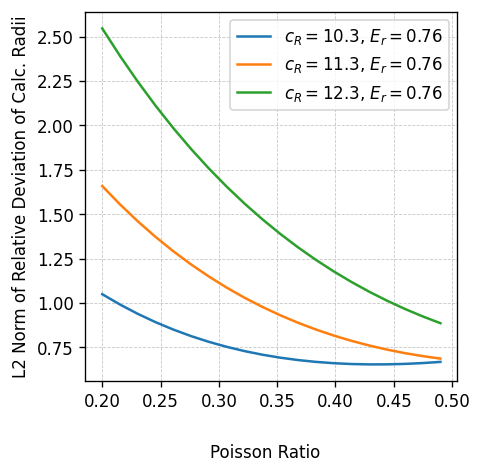

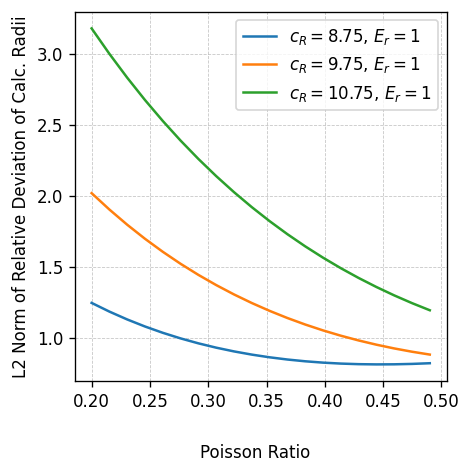

In [316]:
def _calculate_radius_with_measured_layer_mismatch_sensi(df_row, c_R=9, E_ratio=0.76):
    poisson_ratios = np.linspace(0.2, 0.49, 20)

    bbot = (1 / df_row["ratio_bot"] - 1) / df_row["plate thickness h_mm"] / c_R
    btop = (1 / df_row["ratio_top"] - 1) / df_row["plate thickness h_mm"] / c_R


    outputs = {pr:
        optimal_radius(tau=df_row["middle surface τ"],
                            h=df_row["plate thickness h_mm"],
                            total_thickness=df_row["total thickness_mm"],
                            btop=btop,
                            bbot=bbot,
                            youngs_modulus=[E_ratio * YOUNGS_MODULUS, YOUNGS_MODULUS],
                            poisson_ratio=[pr, pr],
                            measured_radius=df_row["r_mm"])["relative_deviation"]

        for pr in poisson_ratios}

    return pd.Series(outputs, name=f"c_R={c_R}, E_ratio={E_ratio}")


crs = [8.85-0.5, 8.85, 8.85+0.5]
ers = [0.76, 1]

def create_sensi_plot(crs, ers):
    df_sensitivity_analysis = {(cr, Er) : df_radius_from_measured_mismatch_averaged_final.apply(_calculate_radius_with_measured_layer_mismatch_sensi, args=(cr, Er), axis=1).reset_index(drop=True)
                            for cr in crs for Er in ers}

    squared_sensitivity_analysis = {(cr, Er) : pd.Series((df_sensitivity_analysis[(cr, Er)] ** 2).sum(axis=0), name=f"$c_R=${cr}, $E_r=${Er}")
                            for cr in crs for Er in ers}

    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches

    fig, ax = plt.subplots(nrows=1, ncols=len(ers), figsize=(4 * len(ers), 4), sharex=True, sharey=False, dpi=120)

    fig.text(0.5, -0.05, "Poisson Ratio", transform=fig.transFigure, horizontalalignment='center')

    #fig.text(0.5, 0.95, "Poisson Ratio Sensitivity of calculated radii", ha='center', fontsize=16, fontweight='bold')
    #fig.text(0.04, 0.5, "L2 Norm of Relative Deviation of Calc. Radii", va='center', rotation='vertical')

    for cr in range(len(crs)):
        for Er in range(len(ers)):
            if len(ers) > 1:
                ax[Er].set_title(f"$c_R=${crs[cr]}")
                ax[Er].plot(squared_sensitivity_analysis[(crs[cr], ers[Er])], label=f"$c_R=${crs[cr]}, $E_r=${ers[Er]}")
                ax[Er].grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
                ax[Er].legend(loc='upper right')
            else:
                ax.plot(squared_sensitivity_analysis[(crs[cr], ers[Er])], label=f"$c_R=${crs[cr]}, $E_r=${ers[Er]}")
                ax.set_ylabel("L2 Norm of Relative Deviation of Calc. Radii")
                ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
                ax.legend(loc='upper right')

    plt.show()


create_sensi_plot([11.3-1, 11.3, 11.3+1], [0.76])
create_sensi_plot([9.75-1, 9.75, 9.75+1], [1])


___
___

## 21. Revision: 

> 3.    The mathematical modeling section is technically rich but lacks sufficient justification for selecting the Schmidt (2007) framework over simpler alternatives such as bilayer Timoshenko-based models. The model assumes isotropy, symmetric mismatch, and uniform material properties—assumptions that are not convincingly validated by the biological data. Moreover, the model predictions deviate considerably from measured curvature values (up to ±84%), and the correlation coefficient of 0.34 indicates limited predictive strength. The authors should address these limitations more critically, and either refine the model or present it more cautiously as an exploratory first step.



### Justification for selecting the Schmidt framework:

There have been different approaches to describe the curvature of strained multilayer films, most prominently the classical Timoshenko formula, which was later extended to incorperate surface stress, to be correct on the order of magnitude of nanotubes. This approach provides a straightforward way to derive a theoretical leaf curvature, assuming we model our leaf to be isotropic and consisting of two layers. We however want to utilize a more complex model derived as a Gamma Limit from three dimensional elasticity. This model will be more flexible as that it allows full control over the material properties of the layers.



## 22. Optimal Radius with Timoshenko based Model:

In [317]:
from tubes import radius_strain_theory

df_radius_from_measured_mismatch_timoshenko = df_radius_from_measured_mismatch_averaged_final.copy()

c_R = 10.3

df_radius_from_measured_mismatch_timoshenko["B_bot"] = (1 / df_radius_from_measured_mismatch_timoshenko["ratio_bot"] - 1) / df_radius_from_measured_mismatch_timoshenko["plate thickness h_mm"] / c_R
df_radius_from_measured_mismatch_timoshenko["B_top"] = (1 / df_radius_from_measured_mismatch_timoshenko["ratio_top"] - 1) / df_radius_from_measured_mismatch_timoshenko["plate thickness h_mm"] / c_R


df_radius_from_measured_mismatch_timoshenko["ratio_top"] = 1 / (1 + df_radius_from_measured_mismatch_timoshenko["B_top"] * df_radius_from_measured_mismatch_timoshenko["plate thickness h_mm"])
df_radius_from_measured_mismatch_timoshenko["ratio_bot"] = 1 / (1 + df_radius_from_measured_mismatch_timoshenko["B_bot"] * df_radius_from_measured_mismatch_timoshenko["plate thickness h_mm"])


# ell = 1
# P = np.array([[1, -ell], list(df_radius_from_measured_mismatch_timoshenko[["thickness lower layer_mm", "thickness upper layer_mm"]].mean() / df_radius_from_measured_mismatch_timoshenko[["thickness lower layer_mm", "thickness upper layer_mm"]].mean().sum())
# ])
# YOUNGS_MODULI = tuple(np.linalg.solve(P, np.array([0, YOUNGS_MODULUS])))

def _calculate_radius_with_timoshenko(df_row: pd.Series):
    # LAYERS ARE SWAPPED ON PURPOSE TO GUARANTEE EPSILON > 0 WITHIN THE MODEL
    return radius_strain_theory(
        E_bot = YOUNGS_MODULUS,
        E_top = YOUNGS_MODULUS * 0.76,
        t_top = df_row["thickness lower layer_mm"],
        t_bot = df_row["thickness upper layer_mm"],
        lattice_bot = df_row["ratio_top"],
        lattice_top = df_row["ratio_bot"],
        poisson_ratio = 0.4,
        relaxation = 1)

df_radius_from_measured_mismatch_timoshenko["r_measured"] = df_radius_from_measured_mismatch_timoshenko.apply(_calculate_radius_with_timoshenko, axis=1)

df_radius_from_measured_mismatch_timoshenko["relative_deviation"] = (df_radius_from_measured_mismatch_timoshenko["r_measured"] - df_radius_from_measured_mismatch_timoshenko["r_mm"]) / df_radius_from_measured_mismatch_timoshenko["r_mm"]
df_radius_from_measured_mismatch_timoshenko["relative_deviation"] = df_radius_from_measured_mismatch_timoshenko["relative_deviation"].apply(lambda x: str(round(100 * x, 2)) + "%")

df_radius_from_measured_mismatch_timoshenko.to_excel("results_22_01_2025_nick_timoshenko.xlsx", index=False)

df_radius_from_measured_mismatch_timoshenko


,leaf stage,sample,leaf half,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper layer_mm,thickness lower layer_mm,middle surface τ,total thickness_mm,leaf_width_mm,plate thickness h_mm,ratio_bot,ratio_top,B_bot,B_top,r_measured,relative_deviation
0,J0,C01,inner,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.057000,0.108667,0.155936,0.165667,60.448,0.002741,0.983841,0.926109,5.992900,29.112413,1.345762,-28.75%
1,J0,C02,inner,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.860,2.563,1.317571,0.758972,0.060667,0.143433,0.202760,0.204100,73.546,0.002775,0.983841,0.926109,5.918426,28.750636,1.761291,33.68%
2,J0,C03,inner,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,1.191,2.380,1.264500,0.790826,0.051367,0.171333,0.269346,0.222700,41.638,0.005348,0.983841,0.926109,3.070859,14.917672,2.197263,73.77%
3,J0,C04,inner,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,0.656,2.481,1.262182,0.792279,0.050667,0.131333,0.221612,0.182000,46.339,0.003928,0.983841,0.926109,4.181821,20.314525,1.620828,28.41%
4,J0,C06,inner,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.415,3.109,1.635001,0.611620,0.061000,0.144667,0.203404,0.205667,62.311,0.003301,0.983841,0.926109,4.976122,24.173092,1.776589,8.66%
5,J1,A01,inner,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.070333,0.106000,0.101134,0.176333,60.348,0.002922,1.009281,0.962404,-3.147165,13.369455,1.755466,-5.99%
6,J1,C02,inner,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.054667,0.106333,0.160455,0.161000,53.834,0.002991,1.009281,0.962404,-3.074835,13.062191,1.681931,11.44%
7,J1,C03,inner,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.063333,0.142667,0.192557,0.206000,43.277,0.004760,1.009281,0.962404,-1.931884,8.206825,2.240743,-9.05%
8,J1,C04,inner,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.054000,0.149333,0.234426,0.203333,64.786,0.003139,1.009281,0.962404,-2.929973,12.446804,2.374045,14.28%
9,J1,C05,inner,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.050333,0.136333,0.230357,0.186667,81.568,0.002288,1.009281,0.962404,-4.018316,17.070188,2.162305,-25.5%


### Results of the Timoshenko based model:

With the correct relaxation, the model yields radii all in the correct order of magnitude compared to the measured radii. 
However the correlation is even negative.

In [318]:
radius_stats_averaged_timoshenko = pd.Series({
    "correlation": df_radius_from_measured_mismatch_timoshenko["r_mm"].corr(df_radius_from_measured_mismatch_timoshenko["r_measured"]),
    "variance of differences": (df_radius_from_measured_mismatch_timoshenko["r_mm"] - df_radius_from_measured_mismatch_timoshenko["r_measured"]).var(),
    "variance of measured": df_radius_from_measured_mismatch_timoshenko["r_mm"].var(),
    "mean of differences": (df_radius_from_measured_mismatch_timoshenko["r_mm"] - df_radius_from_measured_mismatch_timoshenko["r_measured"]).mean()
})

print("Results:")

radius_stats_averaged_timoshenko

Results:


correlation                0.465518
variance of differences    0.289825
variance of measured       0.368378
mean of differences        0.007689
dtype: float64

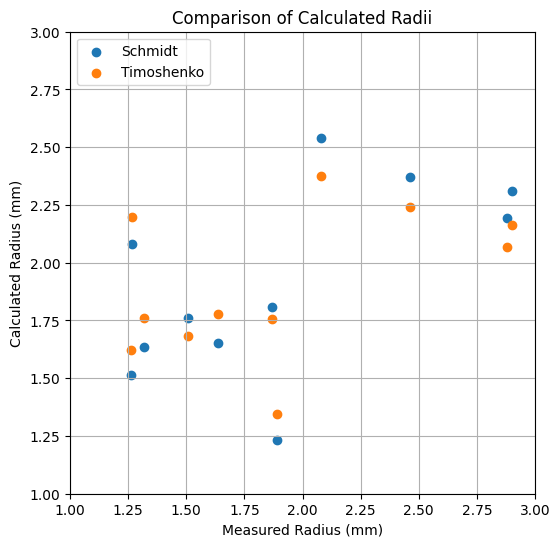

In [319]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(df_radius_from_measured_mismatch_averaged_final_merged["r_mm"], df_radius_from_measured_mismatch_averaged_final_merged["calculated_radius"], label="Schmidt")
plt.scatter(df_radius_from_measured_mismatch_timoshenko["r_mm"], df_radius_from_measured_mismatch_timoshenko["r_measured"], label="Timoshenko")
plt.xlabel("Measured Radius (mm)")
plt.ylabel("Calculated Radius (mm)")
plt.title("Comparison of Calculated Radii")
plt.legend(loc='upper left')
plt.xlim(1, 3)
plt.ylim(1, 3)
plt.grid()
plt.show()

In [320]:
ell = 1
P = np.array([[1, -ell], list(df_radius_from_measured_mismatch_timoshenko[["thickness lower layer_mm", "thickness upper layer_mm"]].mean() / df_radius_from_measured_mismatch_timoshenko[["thickness lower layer_mm", "thickness upper layer_mm"]].mean().sum())
])
YOUNGS_MODULI = tuple(np.linalg.solve(P, np.array([0, YOUNGS_MODULUS])))

def _calculate_radius_with_timoshenko_sensi(df_row: pd.Series):
    poisson_ratios = np.linspace(0.2, 0.49, 20)

    outputs = {
        pr: (radius_strain_theory(
        E_bot = YOUNGS_MODULI[1],
        E_top = YOUNGS_MODULI[0],
        t_top = df_row["thickness lower layer_mm"],
        t_bot = df_row["thickness upper layer_mm"],
        lattice_bot = df_row["ratio_top"],
        lattice_top = df_row["ratio_bot"],
        poisson_ratio = pr,
        relaxation = 0.185) - df_row["r_mm"]) / df_row["r_mm"]

        for pr in poisson_ratios
    }

    return pd.Series(outputs)

result_timoshenko_sensi = df_radius_from_measured_mismatch_timoshenko.apply(_calculate_radius_with_timoshenko_sensi, axis=1).reset_index(drop=True)
#(result_timoshenko_sensi ** 2).sum(axis=0)

## 24. Multilayer / 4 layer approach

#### Updated Cell Statistics

In [321]:
df_cell_data_averages_updated = pd.read_excel("pilea corp rev 1/Spod_statistics_more-measur_Adv-Bio.xlsx")

# gridsize refers to the variable epsilon above
grid_size_top_t0 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "A", "mean_cellnumb_upper"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "A", "mean_cellwidth_upper"].values[0]
grid_size_top_t1 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J0", "mean_cellnumb_upper"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J0", "mean_cellwidth_upper"].values[0]
grid_size_top_t2 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J1", "mean_cellnumb_upper"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J1", "mean_cellwidth_upper"].values[0]

grid_size_bot_t0 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "A", "mean_cellnumb_lower"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "A", "mean_cellwidth_lower"].values[0]
grid_size_bot_t1 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J0", "mean_cellnumb_lower"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J0", "mean_cellwidth_lower"].values[0]
grid_size_bot_t2 = df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J1", "mean_cellnumb_lower"].values[0] * df_cell_data_averages_updated.loc[df_cell_data_averages_updated["leaf.stage"] == "J1", "mean_cellwidth_lower"].values[0]


phi_top_J0A = grid_size_top_t1 / grid_size_top_t0
phi_bot_J0A = grid_size_bot_t1 / grid_size_bot_t0

phi_top_J1A = grid_size_top_t2 / grid_size_top_t0
phi_bot_J1A = grid_size_bot_t2 / grid_size_bot_t0

#### Obtaining the optimal Radius

In [322]:
from tubes import optimal_radius_multilayer

df_4_layers = pd.read_excel("pilea corp rev 1/Spod_leaf-curvature_4layers_final-measurements.xlsx", sheet_name="Data")

layer_thickness_columns = ["thickness lower epidermis_mm", "thickness lower parenchyma_mm",
                           "thickness upper parenchyma_mm", "thickness upper epidermis_mm"]

def calc_interfaces(df_row):
    thicknesses = pd.Series([df_row[col] / df_row["total thickness_mm"] for col in layer_thickness_columns])
    return tuple(thicknesses.cumsum()[:-1] - 0.5)

df_4_layers["interfaces"] = df_4_layers.apply(calc_interfaces, axis=1)


df_4_layers.loc[df_4_layers["leaf stage"] == "J0", "ratio_bot"] = phi_bot_J0A
df_4_layers.loc[df_4_layers["leaf stage"] == "J0", "ratio_top"] = phi_top_J0A
df_4_layers.loc[df_4_layers["leaf stage"] == "J1", "ratio_bot"] = phi_bot_J1A
df_4_layers.loc[df_4_layers["leaf stage"] == "J1", "ratio_top"] = phi_top_J1A

c_R = 12.25

df_4_layers["B_bot"] = (1 / df_4_layers["ratio_bot"] - 1) / df_4_layers["plate thickness h_mm"] / c_R
df_4_layers["B_top"] = (1 / df_4_layers["ratio_top"] - 1) / df_4_layers["plate thickness h_mm"] / c_R

#MULTILAYER_E_SETUP = (YOUNGS_MODULUS * 0.72, YOUNGS_MODULUS / 10, YOUNGS_MODULUS / 10, YOUNGS_MODULUS)
MULTILAYER_NU_SETUP = (0.4, 0.4, 0.4, 0.4)


ell_1 = 1.7
ell_2 = 1/7
P = np.array([[ell_1, 0, 0, -1], [0, 1, -1, 0], [ell_2, -1, 0, 0], df_4_layers[layer_thickness_columns].mean() / df_4_layers[layer_thickness_columns].mean().sum()])
MULTILAYER_E_SETUP = tuple(np.linalg.solve(P, np.array([0, 0, 0, YOUNGS_MODULUS])))

def calculate_optimal_radius_4_layers(df_row):
    result = optimal_radius_multilayer(
        h=df_row["plate thickness h_mm"],
        total_thickness=df_row["total thickness_mm"],
        n_layers=4,
        interfaces=df_row["interfaces"],
        b = [df_row["B_bot"], 0, 0, df_row["B_top"]],
        youngs_moduli = MULTILAYER_E_SETUP,
        poisson_ratios = MULTILAYER_NU_SETUP,
        measured_radius = df_row["r_mm"]
        )

    return pd.Series({"calculated_radius": result["calculated_radius"], "relative_deviation": str(round(100 * result["relative_deviation"], 2)) + "%"})

df_4_layers[["calculated_radius", "relative_deviation"]] = df_4_layers.apply(calculate_optimal_radius_4_layers, axis=1)

df_4_layers

,leaf stage,sample,leaf half,full sample name,a_mm,s_mm,r_mm,curvature_mm,thickness upper epidermis_mm,thickness upper parenchyma_mm,...,total thickness_mm,leaf_width_mm,plate thickness h_mm,interfaces,ratio_bot,ratio_top,B_bot,B_top,calculated_radius,relative_deviation
0,J0,C01,inner,2024-02-13_SP_JO_CO1_PL13_Schnitt2_5µ_4x-zus__...,1.227,3.538,1.888708,0.529462,0.026000,0.040333,...,0.169667,60.448,0.002807,"(-0.38212180746561886, 0.10903732809430255, 0....",0.855306,0.548906,4.920132,23.901103,1.239061,-34.4%
1,J0,C02,inner,2024-02-02_Spod_JO_CO2_PL14_Schnitt1_Bild1_5µ_...,0.860,2.563,1.317571,0.758972,0.022667,0.027333,...,0.168000,73.546,0.002284,"(-0.35912698412698413, 0.20238095238095233, 0....",0.855306,0.548906,6.045624,29.368537,1.459796,10.79%
2,J0,C03,inner,SPJO CO3 PL1 Schnitt2 2x zus_freigestellt,1.191,2.380,1.264500,0.790826,0.024667,0.029000,...,0.184667,41.638,0.004435,"(-0.3953068592057762, 0.20938628158844752, 0.3...",0.855306,0.548906,3.113814,15.126341,1.410624,11.56%
3,J0,C04,inner,SP JO CO4 PL2 Schnitt2 Bild1 2x zus_freigestellt,0.656,2.481,1.262182,0.792279,0.019667,0.024667,...,0.156000,46.339,0.003366,"(-0.38675213675213677, 0.2158119658119657, 0.3...",0.855306,0.548906,4.102167,19.927582,1.288820,2.11%
4,J0,C06,inner,SPJO CO6 PL1 Schnitt3 2x zus_freigestellt,1.415,3.109,1.635001,0.611620,0.025667,0.026000,...,0.179667,62.311,0.002883,"(-0.37940630797773656, 0.21243042671614099, 0....",0.855306,0.548906,4.789482,23.266430,1.395027,-14.68%
5,J1,A01,inner,2024-02-15_SP_J1_AO1_PL_11_Schnitt2_2x zus_fre...,1.252,3.526,1.867282,0.535538,0.027000,0.045333,...,0.174333,60.348,0.002889,"(-0.42160611854684515, 0.08508604206500947, 0....",1.104627,0.713080,-2.676546,11.370219,1.854950,-0.66%
6,J1,C02,inner,2024-01-29_Spod_J1_C02_PL7_Schnitt1_4x zus_fre...,0.590,2.394,1.509245,0.662583,0.021000,0.030333,...,0.153000,53.834,0.002842,"(-0.3627450980392157, 0.16448801742919383, 0.3...",1.104627,0.713080,-2.720555,11.557173,2.045982,35.56%
7,J1,C03,inner,SP J1 CO3 PL5 Schnitt 2 2x_freigestellt,1.156,4.176,2.463702,0.405893,0.027333,0.028667,...,0.191333,43.277,0.004421,"(-0.343205574912892, 0.20731707317073167, 0.35...",1.104627,0.713080,-1.748875,7.429386,2.584331,4.9%
8,J1,C04,inner,SP J1 CO4 PL1 Schnitt2 ganzes Bild 4x zus_frei...,1.242,3.804,2.077362,0.481380,0.026333,0.022333,...,0.170333,64.786,0.002629,"(-0.39236790606653615, 0.2142857142857143, 0.3...",1.104627,0.713080,-2.940856,12.493034,2.001484,-3.65%
9,J1,C05,inner,SPJ1CO5 PL2 Schnitt2 2x zus_freigestellt,0.704,3.790,2.902444,0.344537,0.026333,0.022333,...,0.155000,81.568,0.001900,"(-0.3602150537634409, 0.1860215053763441, 0.33...",1.104627,0.713080,-4.068931,17.285204,1.861915,-35.85%


#### Results

In [323]:
radius_stats_averaged_4_layers = pd.Series({
    "correlation": df_4_layers["r_mm"].corr(df_4_layers["calculated_radius"]),
    "variance of differences": (df_4_layers["r_mm"] - df_4_layers["calculated_radius"]).var(),
    "variance of measured": df_4_layers["r_mm"].var(),
    "mean of differences": (df_4_layers["r_mm"] - df_4_layers["calculated_radius"]).mean()
})

print("Results:")
radius_stats_averaged_4_layers

Results:


correlation                0.580449
variance of differences    0.247762
variance of measured       0.368378
mean of differences        0.182870
dtype: float64

#### Data Export

In [324]:
df_4_layers_and_timoshenko_to_export = df_4_layers.rename({"relative_deviation": "relative_deviation_4_layers", "calculated_radius": "calculated_radius_4_layers"}, axis=1)
df_4_layers_and_timoshenko_to_export[["calculated_radius_timoshenko", "relative_deviation_timoshenko"]] = df_radius_from_measured_mismatch_timoshenko[["r_measured", "relative_deviation"]].rename({"r_measured": "calculated_radius_timoshenko", "relative_deviation": "relative_deviation_timoshenko"}, axis=1)
#df_4_layers.to_excel("results_23_06_2025_nick.xlsx", index=False)

df_4_layers_and_timoshenko_to_export[["τ_1", "τ_2", "τ_3"]] = df_4_layers_and_timoshenko_to_export.apply(lambda x: pd.Series(x["interfaces"]), axis=1)
df_4_layers_and_timoshenko_to_export.drop(["interfaces"], axis=1, inplace=True)

df_4_layers_and_timoshenko_to_export = df_4_layers_and_timoshenko_to_export[['sample', 'leaf stage', 'leaf half', 'full sample name', 'a_mm', 's_mm',
       'r_mm', 'curvature_mm', 'thickness upper epidermis_mm',
       'thickness upper parenchyma_mm', 'thickness lower parenchyma_mm',
       'thickness lower epidermis_mm',
       'total thickness_mm', 'leaf_width_mm', 'plate thickness h_mm', 'τ_1',
       'τ_2', 'τ_3',
       'ratio_bot', 'ratio_top', 'B_bot', 'B_top',
       'calculated_radius_4_layers', 'relative_deviation_4_layers',
       'calculated_radius_timoshenko', 'relative_deviation_timoshenko']]

#df_4_layers_and_timoshenko_to_export.to_excel("results_23_06_2025_nick.xlsx", index=False)

writer = pd.ExcelWriter('results_23_06_2025_nick.xlsx', engine = 'xlsxwriter')
df_4_layers_and_timoshenko_to_export.to_excel(writer, index=False, sheet_name='Data')
workbook  = writer.book
worksheet = writer.sheets['Data']
format1 = workbook.add_format({'num_format': '0.00'})
worksheet.set_column('A:Z', None, format1)  # Adds formatting to column C
writer.close()

### Reasoning for Material Parameters:

We have measurements for the E-Modulus of the whole leaf. We also know that the poisson ratio will be between 0 and 0.5. A poisson ratio sensitivity analysis shows that
for there to be an optimal approximation in this range, we need to reduce the E-Modulus of the lower Epidermis.
Additionally, according to [this paper](https://pmc.ncbi.nlm.nih.gov/articles/PMC4986859/#:~:text=The%20epidermis%20and%20mesophyll%20Young%E2%80%99s,c%7D%20was%20partly%20due),
the Young's Modulus of the mesophyl layers are a order of magnitude smaller with average values of about 0.6 MPa, which justifies the picked values above.